In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import N_A
from math import ceil

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from betheheitler import bh_tot_cs_sp, bh_tot_cs_dp
from screening import fit_More_zstar, Fermi_length

# Style of the plot
plt.style.use('../../utils/minimal.style')
from helper_plots import ticks_real

In [2]:
# Physical parameters
Z = 47
Lf = Fermi_length(Z)

In [3]:
# discretization of g1 axis
Ng = 100
axis_k = np.logspace(np.log10(3.), 4., Ng)

In [4]:
# Provide details on the plasma density
A = 107.8682
rho = 10.49 # g/cm^3
ni = 1.e6 * N_A * rho / A # /m^3

# Provide details on the plasma temperature
Tplasma = 100.
Zstar = fit_More_zstar(Z, A, rho, Tplasma)

In [5]:
cs_tot_Zstar0 = np.array([bh_tot_cs_sp(Z, k, Lf) for k in axis_k])
cs_tot_Zstar47 = np.array([bh_tot_cs_dp(Z, k, Tplasma, ni, Zstar) for k in axis_k])

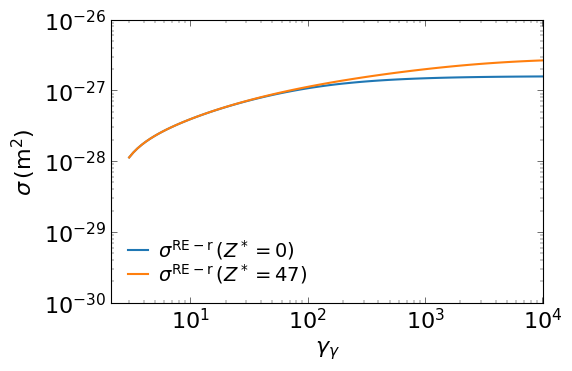

In [6]:
# Figure
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(axis_k, cs_tot_Zstar0, label=r"$ \sigma^{\rm RE-r} \,  (Z^* = 0)$")
axs.plot(axis_k, cs_tot_Zstar47, label=r"$ \sigma^{\rm RE-r} \,  (Z^* = 47)$")
axs.set_xscale('log')
axs.set_xlabel(r"$ \gamma_\gamma $")
axs.set_xlim([2.1, 1.02e4])
axs.set_yscale('log')
axs.set_ylabel(r"$ \sigma \, \rm (m^2) $")
axs.set_ylim([1.e-30, 1.e-26])
plt.legend(loc='best', ncol=1)
plt.tight_layout()
fig.savefig('../figures/figure_5_3', bbox_inches='tight')

plt.show()